#### Read yelp.csv into a DataFrame

* *Bonus*: Ignore the yelp.csv file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [26]:
# read the data and set the datetime as the index
import pandas as pd
url = '../data/yelp.csv'
data = pd.read_csv(url, parse_dates=True)

In [27]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

/Users/dennisyau/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dennisyau/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dennisyau/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


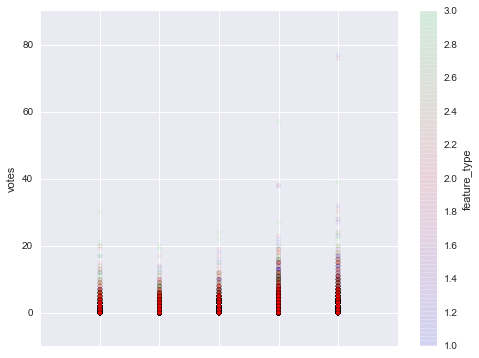

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Create a new column to represent feature type
data['feature_type'] = 0

# cool will be type 1
cools = data[['stars','cool','feature_type']]
# not sure why this rename doesn't work
#cools.rename({'cool':'votes'}, inplace=True)
cools.loc[:,'votes'] = cools.cool
cools.drop('cool', axis=1, inplace=True)
cools.loc[:,'feature_type'] = 1


# useful will be type 2
usefuls = data[['stars','useful','feature_type']]
usefuls.loc[:,'votes'] = usefuls.useful
usefuls.drop('useful',axis=1, inplace=True)
usefuls.loc[:,'feature_type'] = 2

# funny will be type 3
funnys = data[['stars','funny','feature_type']]
funnys.loc[:,'votes'] = funnys.funny
funnys.drop('funny',axis=1,inplace=True)
funnys.loc[:,'feature_type'] = 3

# aggregate together
stars_to_features = pd.concat([cools,funnys,usefuls])
#stars_to_features.head()

# graph with colours!
stars_to_features.plot(kind='scatter',y='votes',x='stars',c='feature_type',colormap='brg',alpha=0.05)


#### Define cool/useful/funny as the features, and stars as the response.

In [66]:
# features
X = data[['cool','useful','funny']]
# responses
y = data.stars

#### Fit a linear regression model and interpret the coefficients.
Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [69]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression

stars_v_cuf = LinearRegression()
stars_v_cuf.fit(X, y)
print stars_v_cuf.intercept_
print stars_v_cuf.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


#### Evaluate the model by splitting it into training and testing sets and computing the RMSE.
Does the RMSE make intuitive sense to you?

In [71]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=8765)

stars_v_cuf2 = LinearRegression()
stars_v_cuf2.fit(X_training,y_training)

y_prediction = stars_v_cuf2.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_prediction))

1.1956140223768228

#### Try removing some of the features and see if the RMSE improves.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

def train_test_rmse(data,features_cols,response_col):
    # create features dataframe X
    X = data[features_cols]
    
    # create response list y
    y = data[response_col]
    
    # train, test, fit
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=96743)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    
    # make a prediction
    predictions = linreg.predict(X_test)
    
    # compare the prediction against the "known truth" and return the Root Mean Squared Error
    return np.sqrt(metrics.mean_squared_error(y_test,predictions))

print train_test_rmse(data,['cool','funny'],'stars')
print train_test_rmse(data,['cool','useful'],'stars')
print train_test_rmse(data,['useful','funny'],'stars')
print train_test_rmse(data,['cool'],'stars')
print train_test_rmse(data,['useful'],'stars')
print train_test_rmse(data,['funny'],'stars')

    

1.19217186891
1.1959243694
1.20927957334
1.20986699294
1.21143085516
1.20991256689


### Bonus
Think of some new features you could create from the existing data that might be predictive of the response.

Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

### Bonus
Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

### Bonus
Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

### Bonus
Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.